In [179]:
import pandas as pd
from matplotlib import pyplot as plt

In [180]:
import numpy as np
import seaborn as sns
import mpl_toolkits
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [181]:
data2019 = pd.read_csv('2019.csv')
data2020 = pd.read_csv('2020.csv')
data2021 = pd.read_csv('2021.csv')
data2022 = pd.read_csv('2022.csv')

In [182]:
avgRent2019 = data2019['1br'].mean()
avgRent2020 = data2020['1br'].mean()
avgRent2021 = data2021['1br'].mean()
avgRent2022 = data2022['1br'].mean()
rentAvgs = [avgRent2019, avgRent2020, avgRent2021, avgRent2022]
years = [2019,2020,2021,2022]


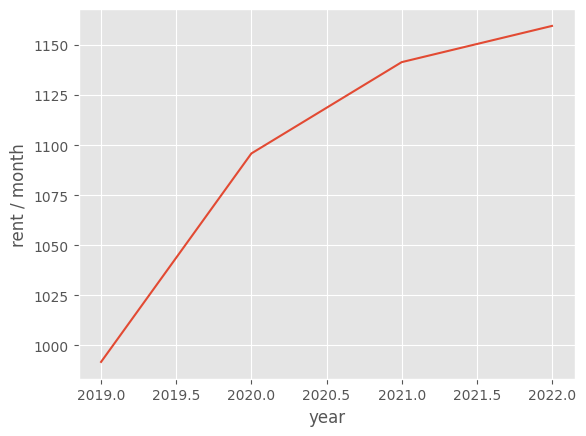

In [183]:
plt.plot(years, rentAvgs)
plt.xlabel('year')
plt.ylabel('rent / month')
plt.show()

Initially we explored the average rent-month in Texas based on data from the fmr values over the past 4 years.

In [184]:
zip75051 = [data2019.iloc[250]['1br'],data2020.iloc[250]['1br'],data2021.iloc[250]['1br'],data2022.iloc[250]['1br']]

zip75160 = [data2019.iloc[100]['1br'],data2020.iloc[100]['1br'],data2021.iloc[100]['1br'],data2022.iloc[100]['1br']]

zip75236 = [data2019.iloc[150]['1br'],data2020.iloc[150]['1br'],data2021.iloc[150]['1br'],data2022.iloc[150]['1br']]

zip76266 = [data2019.iloc[240]['1br'],data2020.iloc[240]['1br'],data2021.iloc[240]['1br'],data2022.iloc[240]['1br']]


zip75094 = [data2019.iloc[70]['1br'],data2020.iloc[70]['1br'],data2021.iloc[70]['1br'],data2022.iloc[70]['1br']]


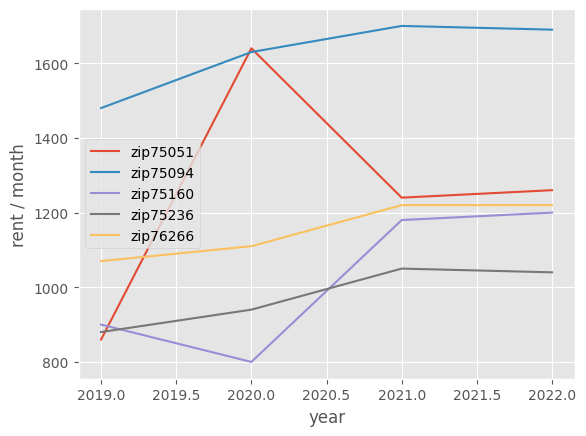

In [185]:
plt.plot(years, zip75051)
plt.plot(years, zip75094)
plt.plot(years, zip75160)
plt.plot(years, zip75236)
plt.plot(years, zip76266)
plt.xlabel('year')
plt.ylabel('rent / month')
plt.legend(['zip75051','zip75094','zip75160', 'zip75236', 'zip76266',])
plt.show()

We explored the price differences accross various zipcodes

<function matplotlib.pyplot.show(close=None, block=None)>

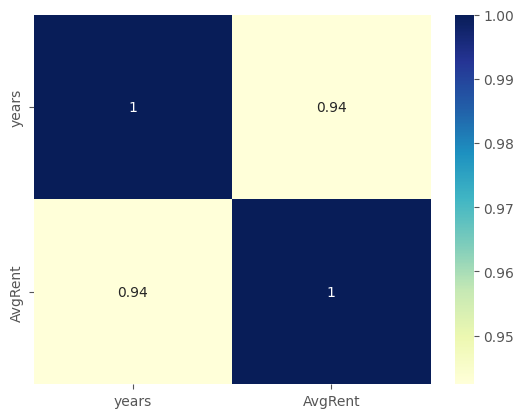

In [186]:
# visualizing data using heatmap
# sns.heatmap(data2019.corr(), cmap='YlGnBu', annot =True)
# plt.show

sf = {'years' : years, 'AvgRent': rentAvgs}
df = pd.DataFrame(data=sf)

sns.heatmap(df.corr(), cmap='YlGnBu', annot =True)
plt.show

The heatmap shows that there is a likelihood of there being a positive correlation between the years and avgRent price.

With more data-points the change will be shown to be weaker but it shows that a linear regression model would be acceptable.

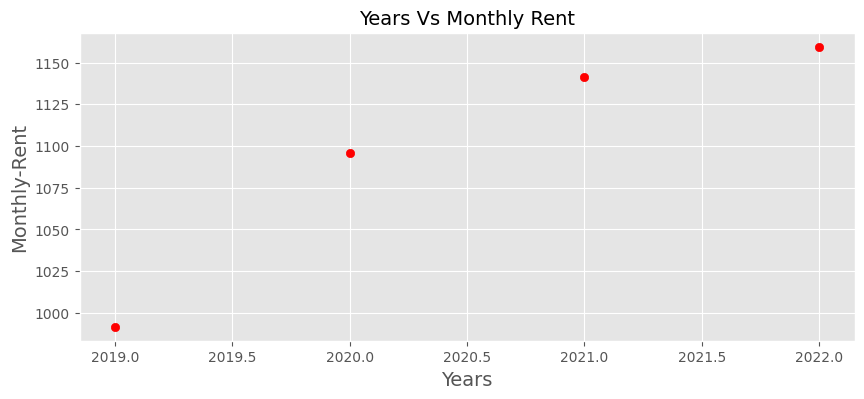

In [187]:
plt.figure(figsize=(10,4))
plt.scatter(df['years'], df['AvgRent'], color = 'red')
plt.title('Years Vs Monthly Rent', fontsize=14)
plt.xlabel('Years', fontsize= 14)
plt.ylabel('Monthly-Rent', fontsize= 14)
plt.grid(True)
plt.show()



In [188]:
n_df = df.drop('AvgRent', axis='columns')
n_df


,years
0,2019
1,2020
2,2021
3,2022


In [189]:
rentprice = df['AvgRent']
rentprice


0     991.711957
1    1095.849057
2    1141.465969
3    1159.556136
Name: AvgRent, dtype: float64

In [190]:
# Create Linear regression object
lr = linear_model.LinearRegression()
lr.fit(n_df,rentprice)

LinearRegression()

In [191]:
# predict the avg cost of monthly rent. based on average data from Dallas
lr.predict([[2023]])
lr.predict([[2024]])


array([1289.34808678])

In [209]:
y_predict = lr.predict([[2023]])

array([1234.4331418 , 1399.17797672])

To Calculate the fair market value of properties, we took into consideration 2 factors.

Factor 1 - Make a fair-market estimation for the housing data based on historical averages in the city.

Factor 2 - Make a fair-market estimation based on historical prices in the zip-code location
